In [ ]:
import os, re
import jieba
from gensim.models import word2vec
from gensim.test.utils import datapath
import time

In [1]:
# 生成wiki文件
routes = list(os.walk('wiki\wiki.zh.text'))[0][1]
filenames = list(os.walk('wiki\wiki.zh.text'))[1][2]
with open('wiki.ch','w+',encoding='utf-8') as w:
    for route in routes:
        for filename in filenames:
            try:
                f = open('wiki/wiki.zh.text/{}/{}'.format(route,filename),'rt',encoding='utf-8')
                content = re.findall(r'[\u4e00-\u9fa5]+',f.read())
                w.write("".join(content)+'\n')
                f.close()
            except:
                break

data10460


In [ ]:
#jieba分词，生成有空格的文件
with open('wiki.ch','rt',encoding='utf-8') as wr:
    with open('wiki.cut','wt',encoding='utf-8') as wc:
        for line in wr:
            preprocess = " ".join(list(jieba.cut(line.strip('\n'))))
            wc.write(preprocess+'\n')  

In [2]:
from gensim.models import word2vec
from gensim.test.utils import datapath
import time

In [7]:
f = open(r'/home/aistudio/data/data10460/wiki.cut','rt',encoding='utf-8')
sentences = word2vec.LineSentence(f)
model = word2vec.Word2Vec(sentences, size=100, window=20, min_count=200, workers=4)


In [8]:
model.save('word_model')

In [4]:
model=word2vec.Word2Vec.load('word_model')

In [5]:
model.wv.similarity('新浪','腾讯')

0.7457916

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def tsne_plot(model):
    print(0)
    labels = []
    tokens = []
    
    print(1)
    i=0
    for word in model.wv.vocab:
        i+=1
        tokens.append(model[word])
        labels.append(word)
        if i<20:
            print(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    print('tsne模型生产')
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    
    print(3)
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    print(4)
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    

In [8]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
tsne_plot(model)

0
1
改隸屬
玉器
稀
使馆
地區則
強盛
克洛斯
腎上
佳人
本次
山茶
三个
一半
下坡
電視版
方法论
遞補
宋军
五十六
tsne模型生产


In [15]:
model.wv['中国']

array([-6.2240767e+00, -2.7751052e+00, -7.0176406e+00, -8.9630287e-04,
        2.1544631e+00,  1.7888067e+00,  1.6998626e-01,  2.3536031e+00,
        9.5420742e-01, -4.4121318e+00,  5.4876075e+00,  2.5539286e+00,
       -6.6567641e-01,  1.3156865e+00, -6.1892831e-01, -7.4273090e+00,
       -1.8044121e+00, -2.0181930e+00,  3.2172501e+00,  6.7779212e+00,
        8.5458148e-01, -1.7553639e+00, -7.3565012e-01, -2.1094623e+00,
       -4.9774923e+00,  2.1017587e+00, -3.7393262e+00,  4.0370512e+00,
       -1.7601399e+00,  3.8002658e-01,  9.9911013e+00, -1.2118086e-01,
        1.0150704e+00, -2.1707475e+00, -4.0358920e+00, -1.5132500e+00,
       -7.3350973e+00, -4.5872798e+00, -3.4144646e-01, -2.7057188e+00,
        1.6660110e+00, -1.7618684e-02, -7.0001554e+00,  1.1045214e+00,
       -5.0128307e+00, -1.2541164e+00, -7.8575087e-01, -3.4305673e+00,
       -1.9951303e-01,  5.8569694e+00,  4.9121147e-01,  1.5156583e+00,
        4.5471735e+00,  2.4253213e-01, -4.7124109e-01,  3.1558368e+00,
      

In [11]:
#在百度服务器上运行
tsne_plot(model)

/opt/conda/envs/python35-paddle120-env/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


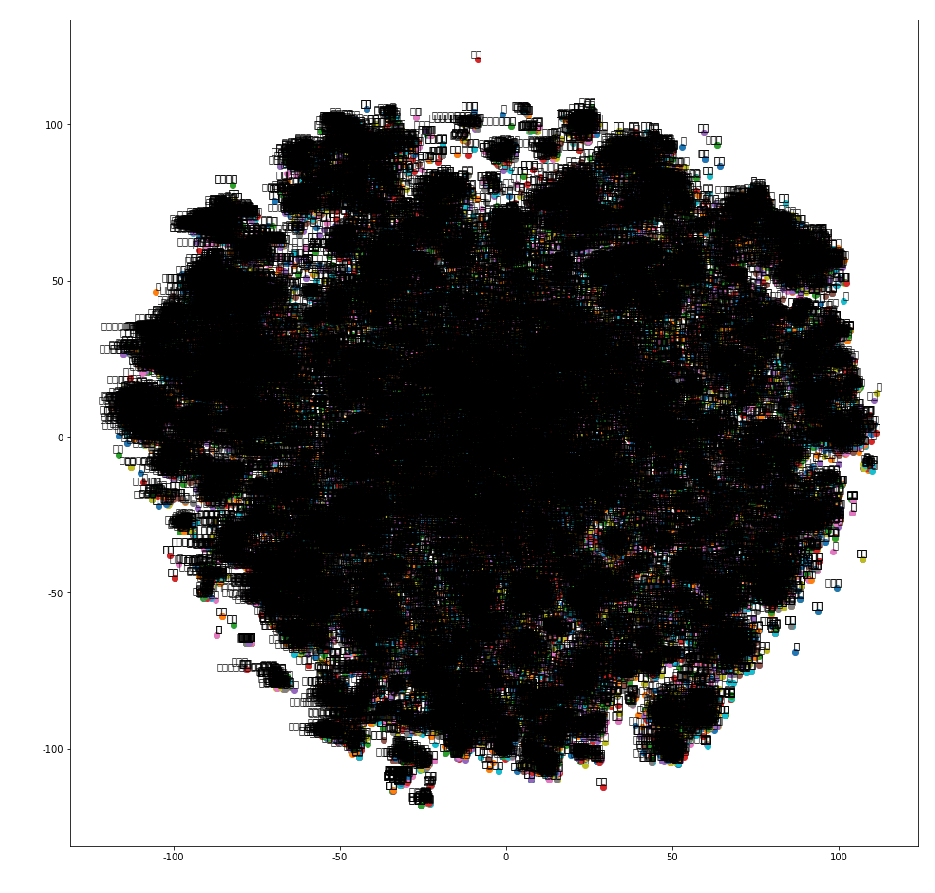

In [4]:
#服务器无法显示中文
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
plt.axis('off')
img = plt.imread(r'C:\Users\Administrator\Desktop\词向量.png')
plt.imshow(img)